### Sydney Properties - Exploratory Data Analysis

by Faiyam Islam

Importing packages to be used for data cleaning and EDA.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("properties.csv")

In [3]:
data.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,11/29/2019 00:00,945000.0,Como,Sydney,NSW,-34.004132,151.061993,3,unit,NSW1009,NSW298
1,09/04/2018 00:00,1150000.0,Concord,Sydney,NSW,-33.866749,151.096050,3,unit,NSW1012,NSW282
2,09/22/2018 00:00,790000.0,Concord,Sydney,NSW,-33.858405,151.100114,2,unit,NSW1012,NSW282
3,03/07/2019 00:00,490000.0,Concord,Sydney,NSW,-33.859850,151.109674,1,unit,NSW1012,NSW282
4,02/05/2019 00:00,570000.0,Concord,Sydney,NSW,-33.862893,151.107620,2,unit,NSW1012,NSW282


In [4]:
data.drop("loc_pid", axis = 1, inplace = True)
df = pd.DataFrame(data)
print(df.shape)

(27012, 10)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27012 entries, 0 to 27011
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_sold      27012 non-null  object 
 1   price          20231 non-null  float64
 2   suburb         27012 non-null  object 
 3   city_name      27012 non-null  object 
 4   state          27012 non-null  object 
 5   lat            27005 non-null  float64
 6   lon            27005 non-null  float64
 7   bedrooms       27012 non-null  int64  
 8   property_type  27012 non-null  object 
 9   lga_pid        27012 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


Descriptive statistics of price, lat, lon and bedrooms of the properties.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,20231.0,823740.846671,518355.444716,41500.000000,555000.000000,695000.000000,915000.000000,8.700000e+06
lat,27005.0,-33.873727,0.076634,-34.112578,-33.914641,-33.877108,-33.825812,-3.354740e+01
lon,27005.0,151.126965,0.107340,150.670227,151.077727,151.140670,151.209147,1.512864e+02
bedrooms,27012.0,1.923145,0.611929,0.000000,2.000000,2.000000,2.000000,3.000000e+00


In [7]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

date_sold           0
price            6781
suburb              0
city_name           0
state               0
lat                 7
lon                 7
bedrooms            0
property_type       0
lga_pid             0
dtype: int64

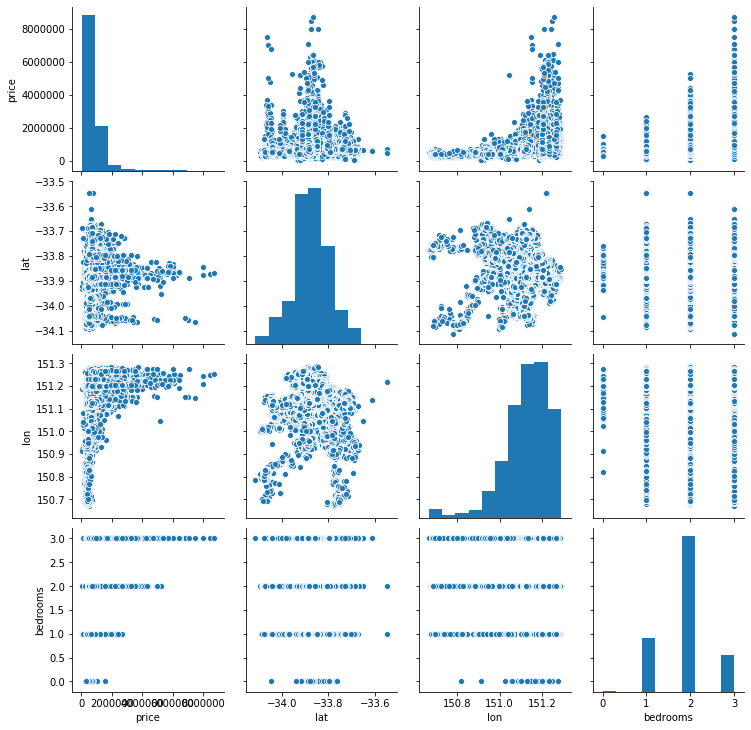

In [10]:
sns.pairplot(df)

Correlation between price, lat, lon and bedrooms. The closer the colours are to dark blue, the greater it's correlation coefficients are. For example, interpreting the correlation between price and longitude, we observe it is around 0.5, meaning we do not have any multicollinearity issues by interpreting this plot itself. 

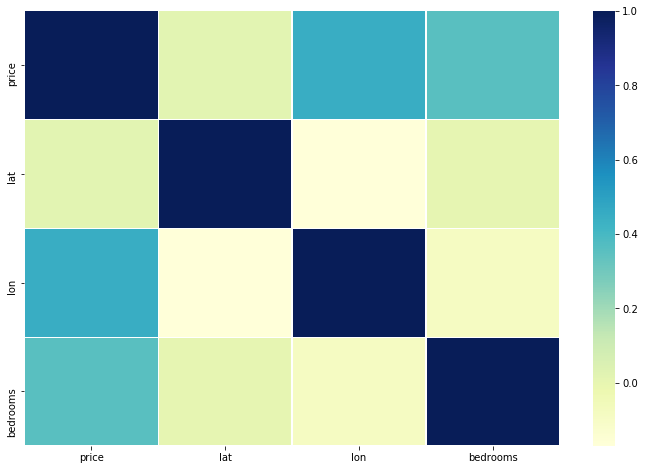

In [12]:
corrmat = df.corr()

f, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(corrmat, ax = ax, cmap = "YlGnBu", linewidths = 0.1)

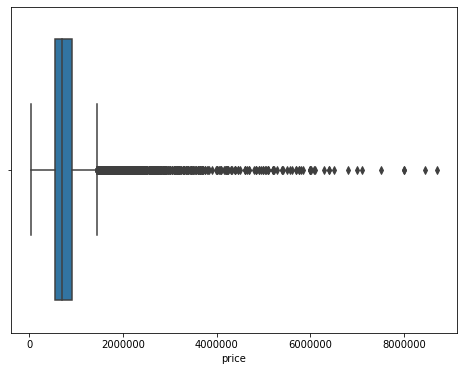

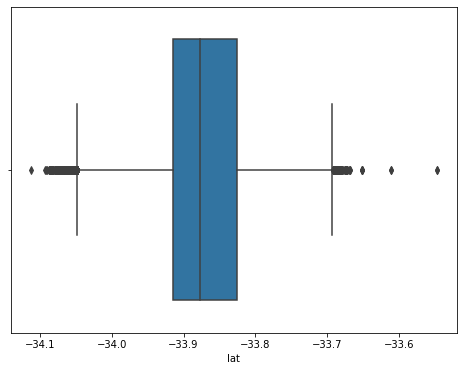

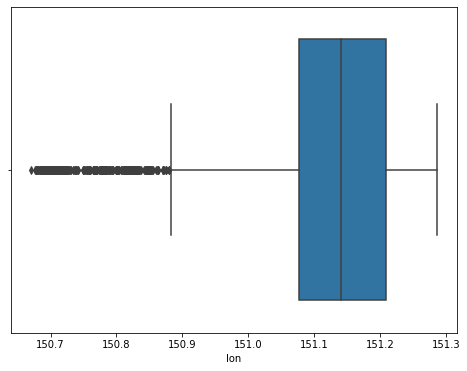

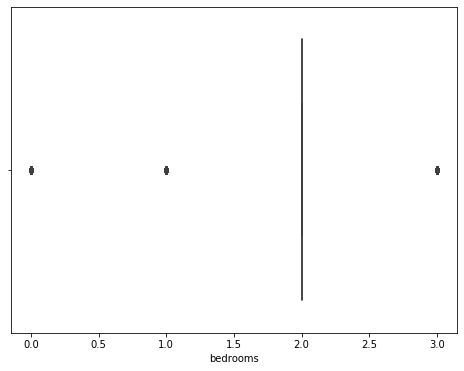

In [13]:
def boxplt(df, columns):
    for i in df.columns:
        if(df[i].dtype == np.int64 or df[i].dtype == np.float64):
            fig, ax = plt.subplots(figsize = (8, 6))
            sns.boxplot(x = df[i])
boxplt(data, df.columns)

In [15]:
#percent of missing values
def percent_missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    gf = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    gf = gf[gf["Percent"] > 0]
    f, ax = plt.subplots(figsize = (8, 6))
    fig = sns.barplot(gf.index, gf["Percent"], color = "purple", alpha = 0.4)
    plt.xlabel('Features', fontsize = 14)
    plt.ylabel('Percent of missing values', fontsize = 16)
    plt.title('Missing values of feature', fontsize = 16)
    return gf

,Total,Percent
price,6781,25.103658
lon,7,0.025914
lat,7,0.025914


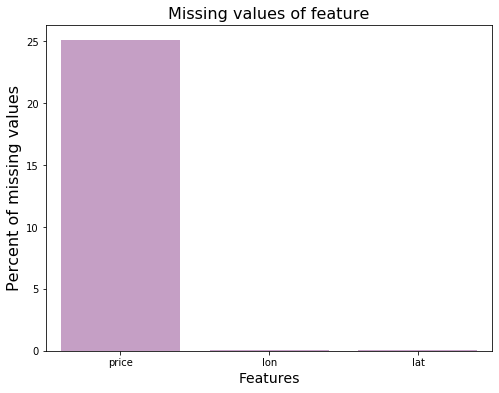

In [16]:
percent_missing(df)

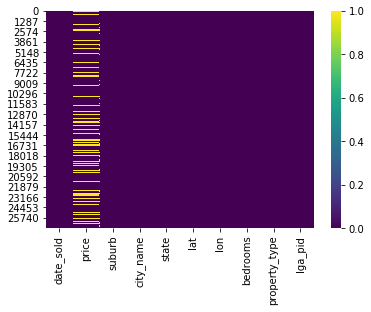

In [17]:
sns.heatmap(df.isnull(), yticklabels = 'auto', cmap = "viridis")

In [22]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
df_fit = df.apply(preprocessing.LabelEncoder().fit_transform)

In [24]:
df_fit

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,lga_pid
0,611,1299,73,0,0,1388,4037,3,0,21
1,439,1502,74,0,0,10810,6109,3,0,17
2,475,1061,74,0,0,11323,6376,2,0,17
3,130,398,74,0,0,11260,7268,1,0,17
4,69,570,74,0,0,11030,7117,2,0,17
...,...,...,...,...,...,...,...,...,...,...
27007,89,1986,321,0,0,11365,13215,2,0,4
27008,604,1988,321,0,0,11376,12989,3,0,4
27009,598,1988,321,0,0,11365,13215,2,0,4
27010,511,2046,321,0,0,11401,12999,3,0,4


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_fit.drop('price', axis=1), df_fit[ "price"], test_size=0.2)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(21609, 9) (21609,)
(5403, 9) (5403,)
